In [1]:
import sys,time,subprocess
import FocusConfig.py
sys.path.append('/home/ccd/ucd-scripts/python-lib')
import Stage

ModuleNotFoundError: No module named 'Stage'

In [2]:
#for config file
CCDtype="ITL" #'ITL' or 'e2v'

zStart=0      #Starting z-position for initial sweep. A point on the near side of the focus.
zEnd=0        #Ending z-position  for initial sweep. A point on the far side of focus.
stepCount= 20 #number of steps in each focus sweep

In [12]:
chosenimages=input("What are the next edge images? ")
chosenimages=[int(number) for number in chosenimages.split(",")]
lowinput,highinput=min(chosenimages),max(chosenimages)

#end the loop if we are zoomed in enough.
if highinput-lowinput>4:
    lookingforfocus==False

What are the next edge images? 9,3
3
9


In [ ]:
import sys,time,subprocess,glob,FocusConfig
import numpy as np #General array managment and what have you
import matplotlib.pyplot as plt #For plotting charts and data
from subprocess import call
from astropy.io import fits #For processing .fits files
from itertools import cycle
sys.path.append('/home/ccd/ucd-scripts/python-lib')
import Stage

stage = Stage.Stage()

#define the image directory
date=datetime.datetime.now().strftime("%Y%m%d")

configfile='/home/ccd/sextractor/default-array_dither.sex'
paramfile='/home/ccd/GUI/sextractor/default-array_dither.param'
maskdir='/home/ccd/sextractor/masks/'
regfilename='/home/ccd/Analysis_Code/focuscurveareas.reg'
imagedir='/mnt/10TBHDD/data/'+date

lookingforfocus=True
startingz=FocusConfig.zStart
zstep=int((FocusConfig.zEnd-startingz)/FocusConfig.stepCount)

iteration=0
while lookingforfocus==True:
    #take the images
    pos=stage.go_to(z=startingz,focus=True)
    subprocess.run('ccs-script /home/ccd/ucd-scripts/ucd-data.py /home/ccd/focus/focusbias',check=True, shell=True)
    sleep(1)
    
    if FocusConfig.stepCount>0:
        for i in range(steps):
            pos=stage.move_stage(x=x,y=y,z=z)
            subprocess.run('ccs-script /home/ccd/ucd-scripts/ucd-data.py /home/ccd/ucd-scripts/examples/spot.cfg',check=True, shell=True)
            time.sleep(1)
    
    #make a plot of the images so you can zoom in on the focus
    files=np.array(glob.glob(imagedir+'*.fits'))
    image=fits.getdata(filename,segment)
    files.sort()
    files=files[-int(FocusConfig.stepCount):]
    imagedata=[]
    for file in files:
        image=fits.getdata(file,13)
        image=image[1800:2000,300:500]
        imagedata.append(image)
    
    fig = plt.figure(1, figsize=(10,10))
    fig.patch.set_facecolor('white')
    for i in range(len(imagedata)):
        ax1=fig.add_subplot(int(FocusConfig.stepCount/5),5,i+1)
        ax1.set_title(str(i),fontsize=15)
        ax1.imshow(imagedata[i])#,vmax=np.median(f[0])+np.std(f[0]),vmin=0)
        ax1.axis('off')
    plt.tight_layout()
    plt.show()
    plt.savefig(imagedir+"/Focus_Iteration_"+str(iteration)+".png")
    
    #choose which images are best
    chosenimages=input("What are the edge images? ")
    chosenimages=[int(number) for number in chosenimages.split(",")]
    lowinput,highinput=min(chosenimages),max(chosenimages)
    
    highz=fits.getheader(files[highinput])["zStage"]
    lowz=fits.getheader(files[lowinput])["zStage"]
    
    startingz=highz
    zstep=int((lowz-startingz)/FocusConfig.stepCount)
    iteration+=1
    
    if highinput-lowinput>4:
        lookingforfocus==False
        midpoint=int((highz-lowz)/2)
        startingz=midpoint+100
        zstep=int(-200/FocusConfig.stepCount)

#take the images
pos=stage.go_to(z=startingz,focus=True)
subprocess.run('ccs-script /home/ccd/ucd-scripts/ucd-data.py /home/ccd/focus/focusbias',check=True, shell=True)
sleep(1)

if FocusConfig.stepCount>0:
    for i in range(steps):
        pos=stage.move_stage(x=x,y=y,z=z)
        subprocess.run('ccs-script /home/ccd/ucd-scripts/ucd-data.py /home/ccd/ucd-scripts/examples/spot.cfg',check=True, shell=True)
        time.sleep(1)

#
files=np.array(glob.glob(imagedir+'*.fits'))
image=fits.getdata(filename,segment)
files.sort()
files=files[-int(FocusConfig.stepCount):]

segdict=dict(zip(arange(1,17),['10','11','12','13','14','15','16','17','07','06','05','04','03','02','01','00']))  

f=open(regfilename)
lines=f.readlines()

regions=[]
for line in lines[3:]:
    if line[:6]=='# tile':
        tilenum=int(line.split()[2])
        #print "Tile number: "+str(tilenum)
    if line[:3]=='box':
        regnums,regend=re.split('#',line)
        yc,xc,ys,xs=[int(float(val)) for val in re.split(',',regnums[4:-4])]
        regtxt=re.split('}',re.split('{',regend)[1])[0]
        regions.append([tilenum,xc,yc,xs/2,ys/2,regtxt])
        #print(tilenum,segdict[tilenum],xc,yc,xs,ys,regtxt)
zpos=[]
for file in files:
    zpos.append(fits.getheader(file)["zStage"])


In [47]:
from astropy.io import fits #For processing .fits files
import matplotlib.pyplot as plt #For plotting charts and data
import numpy as np #General array managment and what have you
import glob
import datetime


In [12]:
date=datetime.datetime.now().strftime("%Y%m%d")
imagedir='/mnt/10TBHDD/data/'+date
#files=np.array(glob.glob(imagedir+'*.fits'))
#image=fits.getdata(filename,segment)

files=np.array(glob.glob('/*.fits'))
files.sort()
files=files[-20:]
print(files)



NameError: name 'datetime' is not defined

In [52]:
imagedata=[]
for file in files:
    image=fits.getdata(file,13)
    image=image[1800:2000,300:500]
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)
    imagedata.append(image)

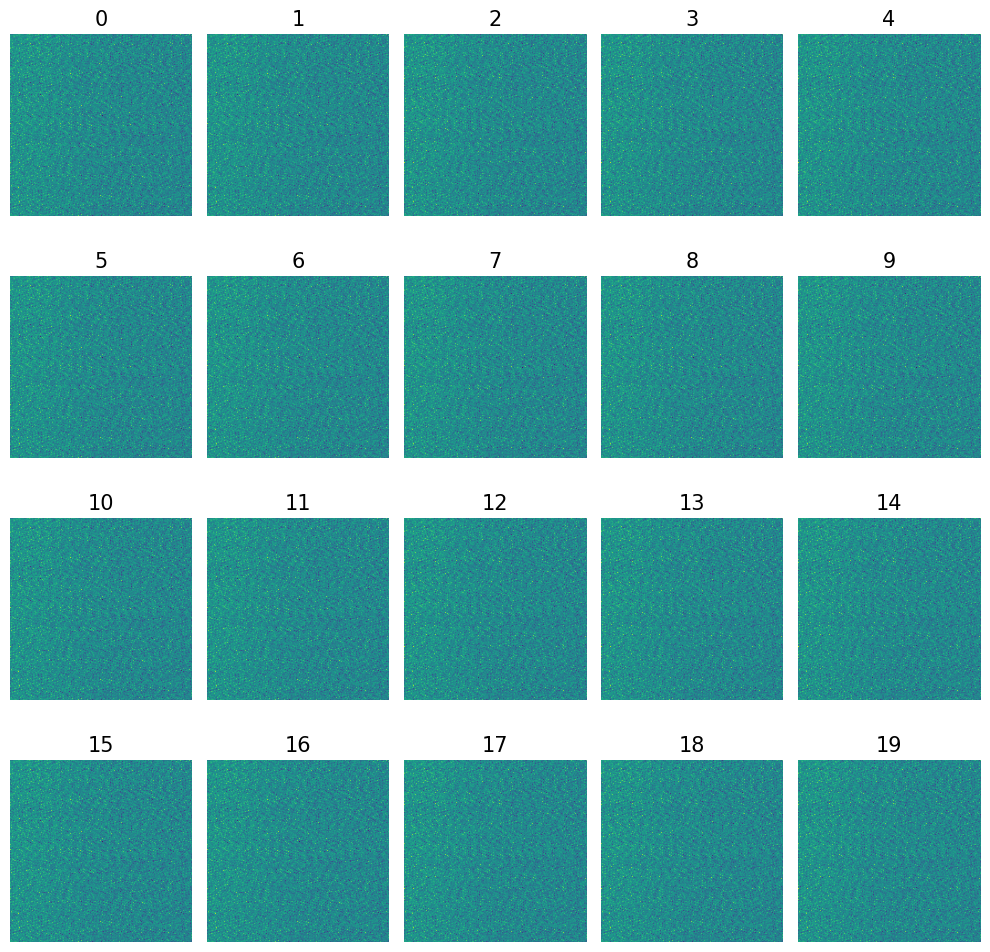

In [65]:
fig = plt.figure(1, figsize=(10,10))
fig.patch.set_facecolor('white')

for i in range(len(imagedata)):
    #ax1=fig.add_subplot(int(FocusConfig.stepCount/5),5,i+1)
    ax1=fig.add_subplot(4,5,i+1)
    ax1.set_title(str(i),fontsize=15)
    ax1.imshow(imagedata[i])#,vmax=np.median(f[0])+np.std(f[0]),vmin=0)
    ax1.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import sys,time,subprocess,glob,FocusConfig
import numpy as np #General array managment and what have you
import matplotlib.pyplot as plt #For plotting charts and data
from subprocess import call
from astropy.io import fits #For processing .fits files
from itertools import cycle
sys.path.append('/home/ccd/ucd-scripts/python-lib')
import Stage

class Focus_Finder():
    def __init__(self):
        self.date=datetime.datetime.now().strftime("%Y%m%d")

        self.configfile='/home/ccd/sextractor/default-array_dither.sex'
        self.paramfile='/home/ccd/GUI/sextractor/default-array_dither.param'
        self.maskdir='/home/ccd/sextractor/masks/'
        self.regfilename='/home/ccd/Analysis_Code/focuscurveareas.reg'
        self.imagedir='/mnt/10TBHDD/data/'+date

        self.lookingforfocus=True
        self.startingz=FocusConfig.zStart
        self.zstep=int((FocusConfig.zEnd-startingz)/FocusConfig.stepCount)
        self.stepCount=FocusConfig.stepCount
        
        return
    
    def take_series(self):
        #take the images
        pos=stage.go_to(z=startingz,focus=True)
        subprocess.run('ccs-script /home/ccd/ucd-scripts/ucd-data.py /home/ccd/focus/focusbias',check=True, shell=True)
        sleep(1)

        if FocusConfig.stepCount>0:
            for i in range(steps):
                pos=stage.move_stage(x=x,y=y,z=z)
                subprocess.run('ccs-script /home/ccd/ucd-scripts/ucd-data.py /home/ccd/ucd-scripts/examples/spot.cfg',check=True, shell=True)
                time.sleep(1)
    
    def get_last_series_files(self):
        files=np.array(glob.glob(self.imagedir+'*.fits'))
        files.sort()
        files=files[-int(self.stepCount):]
        
    def find_focus(self):
        iteration=0
        while lookingforfocus==True:
            self.take_series()

            #make a plot of the images so you can zoom in on the focus
            files=np.array(glob.glob(self.imagedir+'/*.fits'))
            files.sort()
            files=files[-int(self.stepCount):]
            imagedata=[]
            for file in files:
                image=fits.getdata(file,13)
                image=image[1800:2000,300:500]
                imagedata.append(image)

            fig = plt.figure(1, figsize=(10,10))
            fig.patch.set_facecolor('white')
            for i in range(len(imagedata)):
                ax1=fig.add_subplot(int(FocusConfig.stepCount/5),5,i+1)
                ax1.set_title(str(i),fontsize=15)
                ax1.imshow(imagedata[i])#,vmax=np.median(f[0])+np.std(f[0]),vmin=0)
                ax1.axis('off')
            plt.tight_layout()
            plt.show()
            plt.savefig(self.imagedir+"/Focus_Iteration_"+str(iteration)+".png")

            #choose which images are best
            chosenimages=input("What are the edge images? ")
            chosenimages=[int(number) for number in chosenimages.split(",")]
            lowinput,highinput=min(chosenimages),max(chosenimages)

            highz=fits.getheader(files[highinput])["zStage"]
            lowz=fits.getheader(files[lowinput])["zStage"]

            startingz=highz
            zstep=int((lowz-startingz)/FocusConfig.stepCount)
            iteration+=1

            if highinput-lowinput>4:
                lookingforfocus==False
                midpoint=int((highz-lowz)/2)
                startingz=midpoint+100
                zstep=int(-200/FocusConfig.stepCount)
            

In [2]:
try:
    a=input("f")
    a=int(a)
except ValueError:
    print("you must enter a number")

fg
you must enter a number


In [10]:
def reset_positions():
    reset=input("Reset positions? (y/n): ")
    if reset=="y" or reset=="Y" or reset=="yes" or reset=="Yes" or reset=="true" or reset=="True":
        tries=0
        while tries<4:
            try:
                startingz=int(input("New starting z position: "))
                return True
            except ValueError:
                print("You must enter z positions as an integer.")
                tries+=1
    return False

In [11]:
reset_positions()

Reset positions? (y/n): y
New starting z position: g
You must enter z positions as an integer.
New starting z position: g
You must enter z positions as an integer.
New starting z position: g
You must enter z positions as an integer.
New starting z position: g
You must enter z positions as an integer.


False

In [13]:
len([])

0

In [1]:
import datetime

In [2]:
date=datetime.datetime.now().strftime("%Y%m%d")


imagedir='/mnt/10TBHDD/data/'+date

In [3]:
imagedir

'/mnt/10TBHDD/data/20230629'

In [3]:
import sys,time,subprocess,glob,FocusConfig
import numpy as np #General array managment and what have you
import matplotlib.pyplot as plt #For plotting charts and data
from subprocess import call
from astropy.io import fits #For processing .fits files
from itertools import cycle
import datetime
sys.path.append('/home/ccd/ucd-scripts/python-lib')

#define the image directory
date=datetime.datetime.now().strftime("%Y%m%d")

configfile='/home/ccd/sextractor/default-array_dither.sex'
paramfile='/home/ccd/GUI/sextractor/default-array_dither.param'
maskdir='/home/ccd/sextractor/masks/'
regfilename='/home/ccd/Analysis_Code/focuscurveareas.reg'
imagedir='/mnt/10TBHDD/data/'+date

In [6]:
files=np.array(glob.glob(imagedir+'/*.fits'))


In [7]:
files

array(['/mnt/10TBHDD/data/20230705/TS_C_20230705_000036_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000010_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000009_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000019_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000005_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000008_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000035_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000056_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000042_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000044_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000038_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000033_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000041_R22_S01.fits',
       '/mnt/10TBHDD/data/20230705/TS_C_20230705_000054_R22_S01.fits',
      

In [9]:
fits.getheader(files[0])["STAGEZ"]

12072

In [10]:
-4483>-2298

False

In [11]:
max(-4483,-2298)

-2298